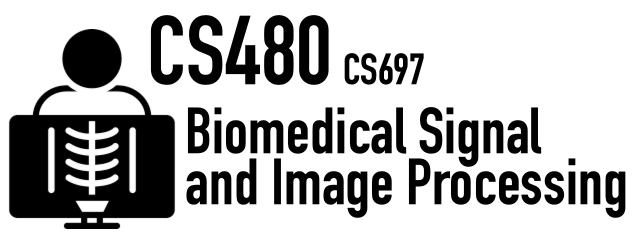
#Assignment 4

In [ ]:
# In this assignment, we will create a Random Forest classifier to detect pneumonia!

In [ ]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['cm', 'clf', 'grid']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
# we are using mahotas again, so lets install it!
!pip install mahotas

In [ ]:
# our imports include sklearn this time
import mahotas as mh
import os
from sklearn.ensemble import RandomForestClassifier

**Task 1:** Download, extract, and load the data! [15 Points]

In [ ]:
# Please download this file: https://cs480.org/data/xray.zip
# This is a subset of the Kaggle Pneumonia Dataset!
#
# TODO: Upload xray.zip using the file panel on the left.

In [ ]:
# the folder structure of normal/ and pneumonia/ images.
# Each folder contains the first images of the Kaggle dataset.
import zipfile
with zipfile.ZipFile('xray.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

NORMAL_DIR = 'normal/'
PNEUMONIA_DIR = 'pneumonia/'

In [ ]:
# Here we load the first image from the normal dataset.
img = mh.imread(NORMAL_DIR + 'IM-0115-0001.jpeg')

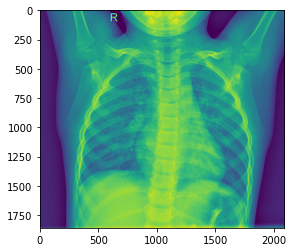

In [ ]:
imshow(img)

In [ ]:
img.shape

(1858, 2090)

**Task 2:** Let's do some data wrangling and more visualization! [35 Points]

In [ ]:
normal_files = os.listdir( NORMAL_DIR )

normal_images = np.zeros( (len(normal_files), 300, 300), dtype=np.float32)

for i in range(len(normal_files)):
  loaded_image = mh.imread( NORMAL_DIR + normal_files[i], as_grey=True )

  loaded_image = mh.imresize( loaded_image, (300, 300) )
  img_shape = loaded_image.shape

  normal_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [ ]:
pneumonia_files = os.listdir( PNEUMONIA_DIR )

pneumonia_images = np.zeros( (len(pneumonia_files), 300, 300), dtype=np.float32)

for i in range(len(pneumonia_files)):
  loaded_image = mh.imread( PNEUMONIA_DIR + pneumonia_files[i], as_grey=True )
  
  loaded_image = mh.imresize( loaded_image, (300, 300) )
  img_shape = loaded_image.shape

  pneumonia_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

The two data wrangling operations performed in code block one are:

***Operation 1:*** 

Reading and converting the image into a grayscale image and then resizing it into (300 x 300) pixel size.

***Operation 2:***

Replacing the resized image pixel values in a numpy array inside an array called "normal_images" and "pneumonia_images" which has the same length as the total number of normal images and pneumonia images respectively and each array inside the "normal_images" and "pneumonia_images" array has dimensions of (300 x 300) which is same as the resized image.

 

In [ ]:
# Now, let's look at the first 5 normal_images and the first 5 pneumonia_images.

## **First 5 normal images.**

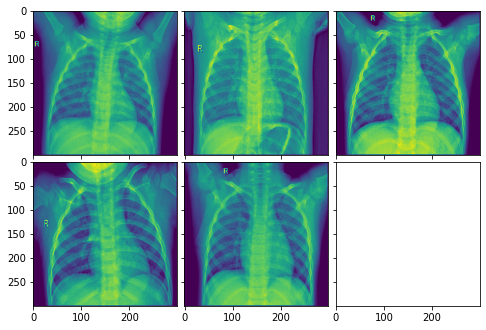

In [ ]:
from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(figsize=(8., 8.))
grid = ImageGrid(fig, 111, nrows_ncols=(2, 3), axes_pad=0.1)

for ax, im in zip(grid, normal_images[0:5]):
    ax.imshow(im)

plt.show()

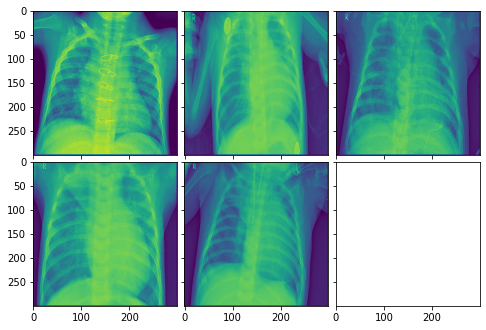

In [ ]:
fig = plt.figure(figsize=(8., 8.))
grid = ImageGrid(fig, 111, nrows_ncols=(2, 3), axes_pad=0.1)

for ax, im in zip(grid, pneumonia_images[0:5]):
    ax.imshow(im)

plt.show()

**Task 3:** Setup training and testing data. [15 Points]

In [ ]:
# Any supervised machine learning algorithm requires disjunct sets of
# training and testing data.
#
# For each, we will create a balanced dataset that includes an equal number
# of normal xrays and pneumonia xrays.
#
# The training data will include 120 images (60 normal, 60 pneumonia).
# The testing data will include the remaining 80 images (40 normal, 40 pneumonia).
#
# Supervised learning means that we tell the algorithm which image is normal
# and which image is pneumonia. For this, we need the training_target vector.
# The vector shall be 0 for a normal image, and 1 for a pneumonia.

In [ ]:
TRAINING_COUNT = 60

training_data = np.zeros( (TRAINING_COUNT * 2, 300*300 ), dtype=np.float32)
for i, n in enumerate( normal_images[0:TRAINING_COUNT] ):
  training_data[i] = n.ravel() # flatten the image
for i, p in enumerate( pneumonia_images[0:TRAINING_COUNT] ):
  training_data[i + TRAINING_COUNT] = p.ravel()

In [ ]:
training_target = np.zeros((TRAINING_COUNT * 2,1), dtype=int)

for i in range(0,TRAINING_COUNT):
  training_target[i][0] = 0

for i in range(TRAINING_COUNT,len(training_target)):
  training_target[i][0] = 1


In [ ]:
TESTING_COUNT = 40

testing_data = np.zeros( (TESTING_COUNT * 2, 300*300 ), dtype=np.float32)
for i, n in enumerate( normal_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data[i] = n.ravel() # flatten the image
for i, p in enumerate( pneumonia_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data[i + TESTING_COUNT] = p.ravel()

In [ ]:
testing_target = np.zeros((TESTING_COUNT * 2,1), dtype=int)

for i in range(0,TESTING_COUNT):
  testing_target[i][0] = 0

for i in range(TESTING_COUNT,len(testing_target)):
  testing_target[i][0] = 1


**Task 4:** Let's train and evaluate the Random Forest! [35 Points]

In [ ]:
# With scikit-learn, we can easily set up a default Random Forest classifier.
clf = RandomForestClassifier()

In [ ]:
# Now, we train the classifier with the training data and the training targets.
# We essentially show the classifier an image and tell whether the image is 
# normal or pneumonia.
fitted = clf.fit( training_data, training_target )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [ ]:
# After training, we can see how well the classifier predicts our testing data.
# The following command will return the classification accuracy.
clf.score( testing_data, testing_target )

0.9

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
prediction = clf.predict(testing_data)
cm = confusion_matrix(testing_target, prediction)
print(cm)
accuracy_score(testing_target,prediction)

[[36  4]
 [ 4 36]]


0.9

This model gives us 90% accuracy. In terms of accuracy for a model the accuracy is good but in mdeical terms it is not that good because right now for example in our test data out of 40 patients, our model is giving 4 wrong predictions, which means 4 people who have pneumonia got classified as the people who do not have pneumonia. This can result into fatal condition as the person might not get treatmeant. The accuracy of the model should be improved.

**Bonus:** Let's take a closer look! [33 Points]

In [ ]:
prediction = clf.predict(testing_data).tolist()
missclassification_nor = [] # normal images that are missclassified.
missclassification_pne = [] # pneumonia images that are missclassified.


for i in range(0, len(prediction)):
  p = prediction[i]
  t = testing_target[i][0]
  if p != t:
    if i<40:
      missclassification_nor.append(i+60)
    else:
      missclassification_pne.append(i+20)   

# Missclassified normal images

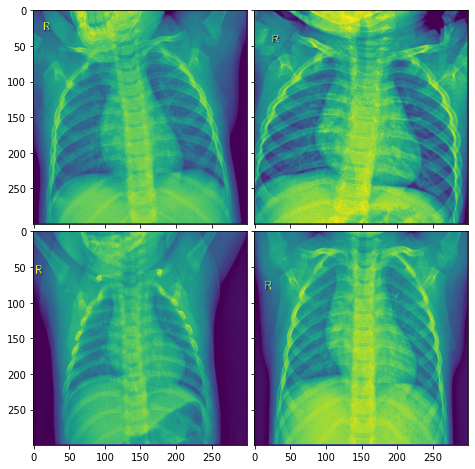

In [ ]:
fig = plt.figure(figsize=(8., 8.))
grid = ImageGrid(fig, 111, nrows_ncols=(2, 2), axes_pad=0.1)

for ax, im in zip(grid, missclassification_nor):
  ax.imshow(normal_images[im])


# Missclassified pneumonia images.

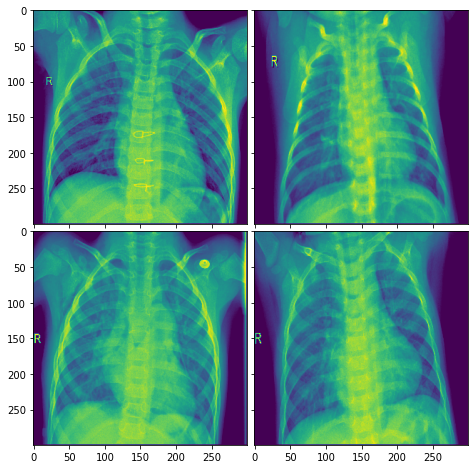

In [ ]:
fig = plt.figure(figsize=(8., 8.))
grid = ImageGrid(fig, 111, nrows_ncols=(2, 2), axes_pad=0.1)

for ax, im in zip(grid, missclassification_pne):
  ax.imshow(pneumonia_images[im])

The classification problem accuracy can be imporved by tuning the hyperparameters of the random forrest like max_depth, n_estimators, criterion, min_samples_split, min_samples_leaf etc.

Also the accuracy can be increased using by giving more data to the model so it can be trained on even more unseen data and make our model more generalised. 

In [ ]:
# Great job!!!
#           ___
#       _.-'   \
#      /        \
#     /          \
#    /            `.___
#   ( .--.)\/(,.--.    `-.
#   ,',-. \   / ,-.`.     )
#  ( /   \     /   \ )   / \
#   || .-|     |-. ||---'|  \
#  _|| | |     | | ||_   |   \
# /. \ |_|.---.|_| / ,\  | .^.\
# `.\ `--"     "--' /,'  |/
#   `>  _________ <'
# ,-' ,---.---.---. `-.
# `--'\    \j/    /`--'
#    `.\         /,'
#      \\_______//
#       `-------'       hjw